# Clustering Jerárquico

Dentro de las técnicas de aprendizaje no supervisado nos encontramos con el **Clustering Jerárquico**. Esta técnica toma su nombre del modo de proceder a la hora de agrupar los puntos de datos de entrada, pues construye una jerarquía de clusters de varios niveles.

Dicha jerarquía se puede construir según dos enfoques opuestos:

- **Aglomerativa** (bottom-up)
- **Divisiva** (top-down)


## Aglomerativo (bottom-up)

Los puntos de datos se agrupan utilizando un enfoque de abajo hacia arriba que comienza con puntos de datos individuales y se van agrupando en clusters más grandes a medida que avanza el proceso.

El algoritmo a seguir para realizar el clustering jerárquico aglomerativo se resume en los siguientes pasos:

1. Cada punto de datos de entrada pertenece a su propio cluster.
2. Se agrupan los dos puntos de datos más cercanos en un mismo cluster.
3. Se van construyendo más clusters al unir los dos cluster más cercanos.
4. Se repite el paso anterior hasta que solo queda un único cluster al cual pertenecen todos los puntos de entrada.

![](https://miro.medium.com/max/1440/1*oF00T9hCGpr6N-1zm2M1nw.gif)

### Medidas de similaridad y distancia entre clusters

Observando el algoritmo anterior se aprecia que es necesario utilizar una medida de similaridad entre puntos para determinar cómo de cerca se encuentran. Pero no solo eso, además necesitamos una manera de medir la distancia entre clusters que pueden estar formados por más de un punto. Esta medida se conoce como el **criterio de vinculación** (_linkage criteria_), y en el caso de _sklearn_ puede realizarse de la siguiente manera:

- **Ward**: minimiza la suma de las diferencias al cuadrado dentro de todos los clusters. Se trata de un enfoque de minimización de la varianza y, en este sentido, es similar a la función objetivo de `k-means`, pero abordada con un enfoque jerárquico aglomerativo.
- **Vinculación máxima** o **completa**: minimiza la distancia máxima entre las observaciones de cada par de clusters.
- **Vinculación media**: minimiza la media de las distancias entre las observaciones de cada par de clusters.
- **Vinculación única**: minimiza la distancia más corta entre las observaciones de cada par de clusters.

En las vinculaciones únicas, medias y máximas es posible configurar la métrica de similaridad que se usa para calcular las distancias:

- Distancia euclídea (L2)
- Distancia Manhattan (L1), 
- Distancia coseno
- Cualquier matriz de afinidad precalculada.

La distancia L1 suele funcionar bien para conjuntos de datos dispersos, donde muchas variables tienen valores nulos para muchas observaciones. Por otro lado,
la distancia del coseno es interesante porque es independiente de las escalas.

### Dendogramas

Estos agrupamientos secuenciales y por niveles forman lo que se conoce como un [Dendograma](https://en.wikipedia.org/wiki/Dendrogram), que es una estructura arbórea.

Para entender cómo funciona el clustering jerárquico aglomerativo y cómo se construye el dendograma, comenzamos con un conjunto de datos de entrada de dos variables:

In [1]:
# Ejemplo obtenido de: https://www.instintoprogramador.com.mx/2019/07/clustering-jerarquico-con-python-y.html
import numpy as np

X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

Vamos a representar gráficamente los puntos de entrada, indexándolos según la posición que ocupan en la matriz `X`:

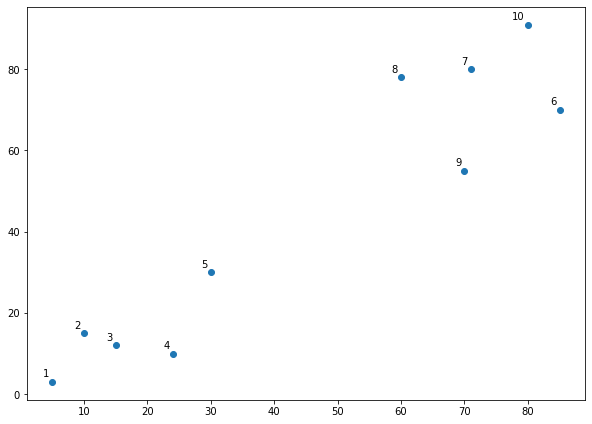

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

Para representar gráficamente los dendogramas, podemos usar la librería [scipy](https://www.scipy.org/):

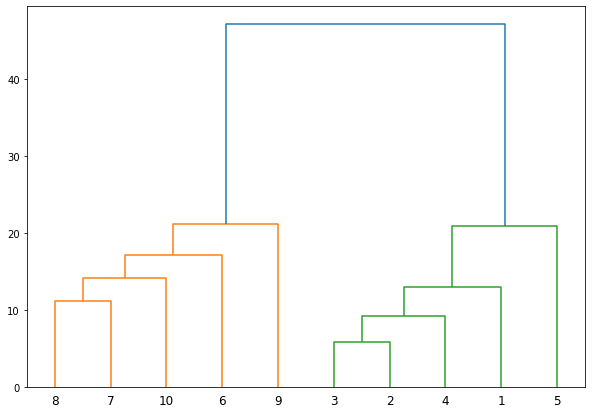

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## Divisivo (top-down)

Este enfoque, complementario al agregativo, comienza con todos los puntos de entrada agrupados en el mismo cluster. Iterativamente va particionando un cluster que se elige según una estrategia.

En otras palabras, el algoritmo sería el siguiente:

1. Se agrupan todos los puntos de entrada en el mismo cluster.
2. Se decide cuál es el cluster que se va a particionar según la estrategia elegida.
3. Se divide ese cluster usando otro algoritmo de clustering (por ejemplo *k-means*).
4. Se repiten los pasos 2-3 hasta que cada punto de entrada pertenezca a su propio cluster o hasta que se alcancen el número de clusters deseados.

Para elegir qué cluster se va a particionar, se suelen utilizar los siguientes enfoques:

- Se particionan todos los clusters que haya.
- Se particiona el cluster que esté formado por más elementos
- Se elige el cluster que tenga la mayor varianza con respecto a su centroide

### Divisivo vs Aglomerativo:

- El **clustering divisivo** es más complejo que el **aglomerativo**, pues hay que lanzar un algoritmo adicional de clustering cada vez que se quiere particionar un cluster existente.
- Sin embargo, el **divisivo** puede ser más eficiente si no se llegan a particionar todos los clusteres hasta que cada punto de entrada forme uno.
- El **clustering divisivo** también es más _preciso_ que el **aglomerativo**, pues éste último toma decisiones de agrupación basada en la información local de los puntos (se van agrupando puntos cercanos) sin tener en cuenta la distribución global de los puntos de entrada, cosa que sí hace el **clustering divisivo**.


## Ejemplo de funcionamiento

En `sklearn` únicamente se encuentra implementado el enfoque aglomerativo a través de la clase [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

Veamos su funcionamiento sobre diferentes conjuntos de datos al variar los parámetros `n_clusters` y `linkage`.

Definimos la función para pintar los resultados:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

def plot_agglomerative(X, n_clusters, linkage):

  min = np.amin(X, axis=0)
  max = np.amax(X, axis=0)

  diff = max - min

  min = min - 0.1 * diff
  max = max + 0.1 * diff

  fig, axs = plt.subplots(len(linkage), len(n_clusters), figsize=(5*len(n_clusters), 5*len(linkage)))
  fig.tight_layout(pad=4.0)

  for i in range(len(linkage)):
    for j in range(len(n_clusters)):

      ac = AgglomerativeClustering(n_clusters=n_clusters[j], linkage=linkage[i]).fit(X)

      axs[i,j].set_title('n_clusters=' + format(n_clusters[j]) + ', linkage=\'' + linkage[i] + '\'')

      axs[i,j].set_xlabel('X1')
      axs[i,j].set_ylabel('X2')

      axs[i,j].set_xlim(min[0], max[0])
      axs[i,j].set_ylim(min[1], max[1])

      axs[i,j].scatter(X[:,0], X[:,1], c=ac.labels_, cmap='rainbow')

Comprobamos el funcionamiento cuando se dispone de 3 *blobs* de diferente varianza:

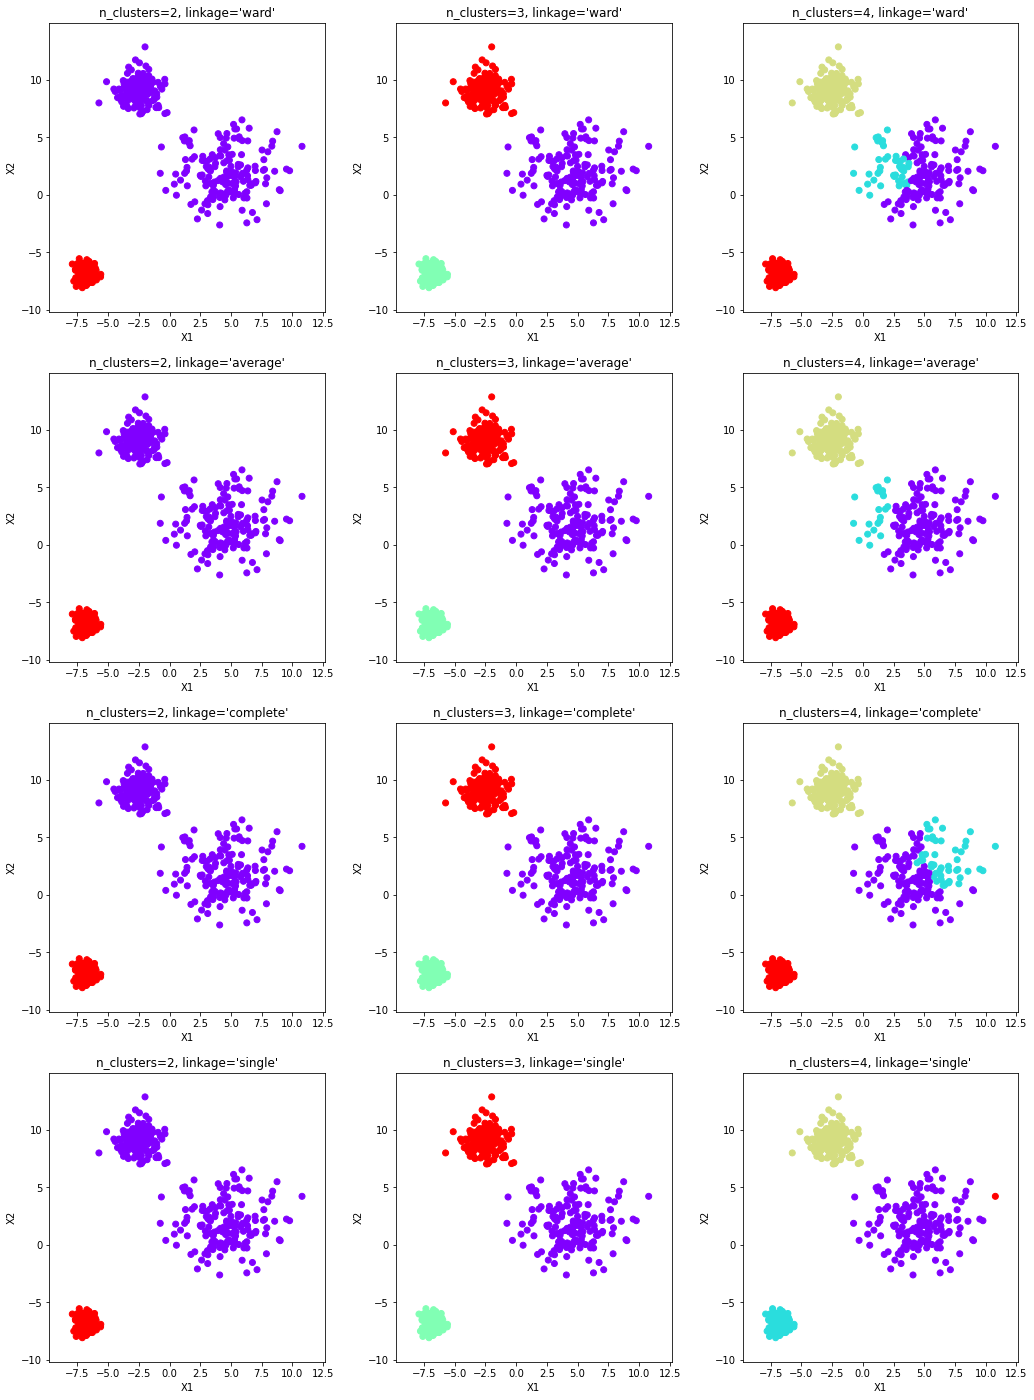

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, cluster_std=[1.0, 2.0, 0.5], random_state=42)

plot_agglomerative(X=X, n_clusters=[2, 3, 4], linkage=['ward', 'average', 'complete', 'single'])

Funcionamiento con las lunas:

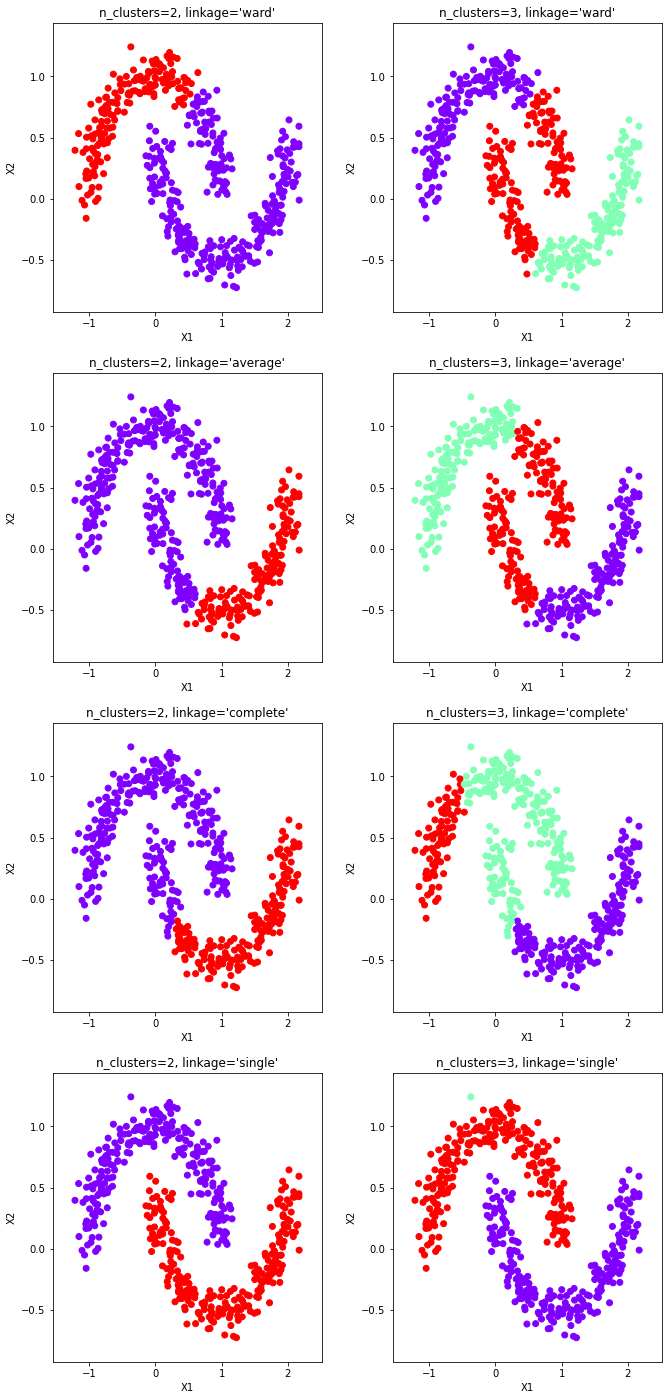

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

plot_agglomerative(X=X, n_clusters=[2, 3], linkage=['ward', 'average', 'complete', 'single'])

Funcionamiento con 3 *blobs* de igual varianza:

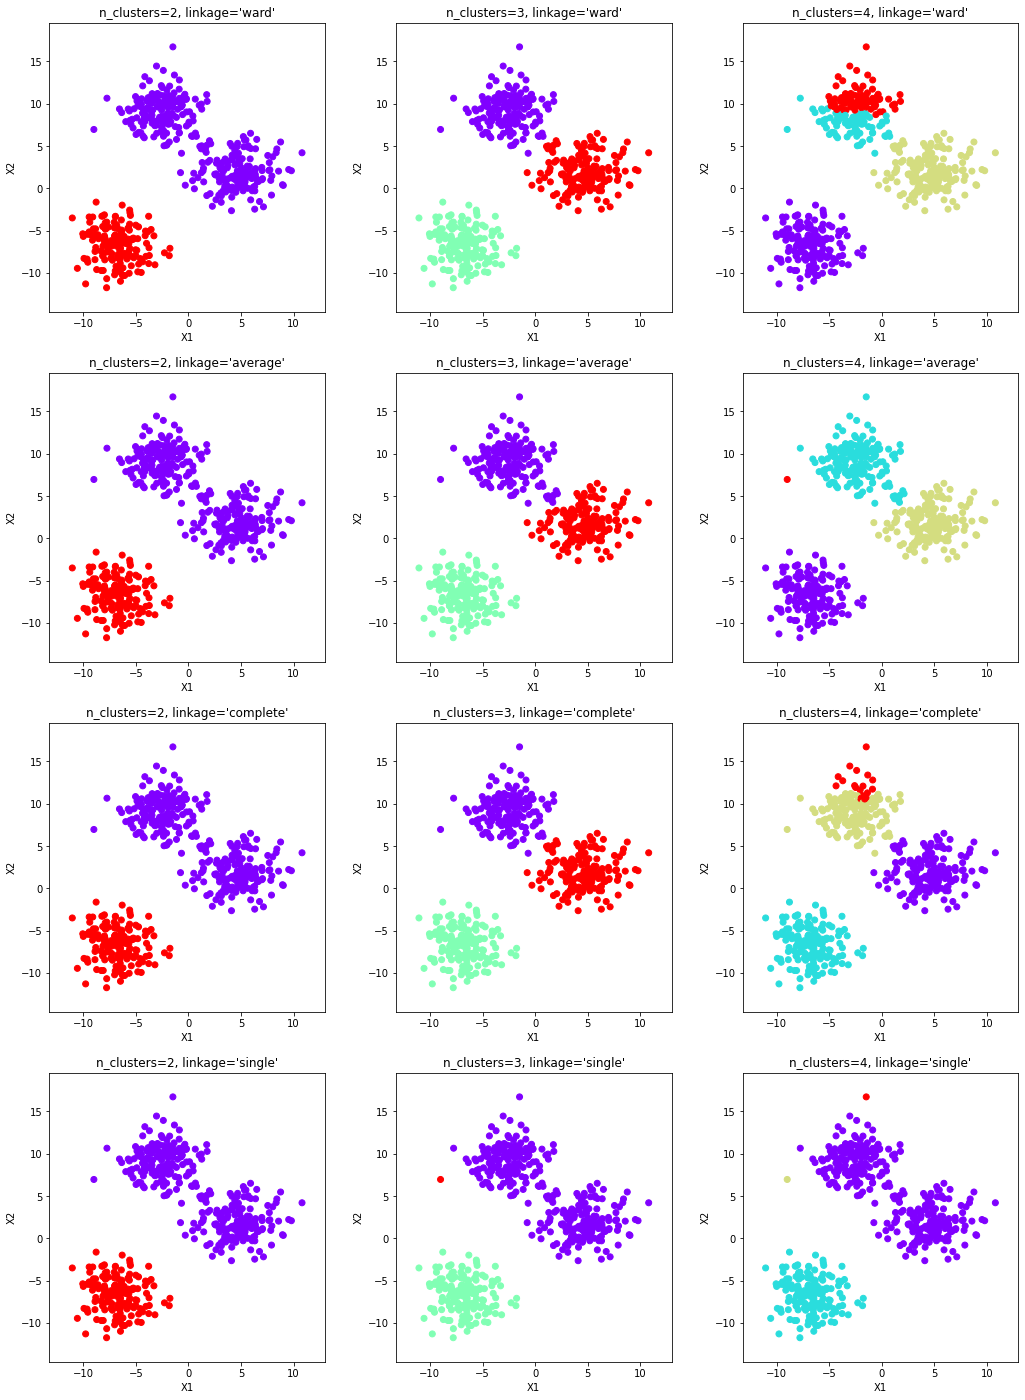

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, cluster_std=2.0, random_state=42)

plot_agglomerative(X=X, n_clusters=[2, 3, 4], linkage=['ward', 'average', 'complete', 'single'])

Funcionamiento con características de desigual varianza:

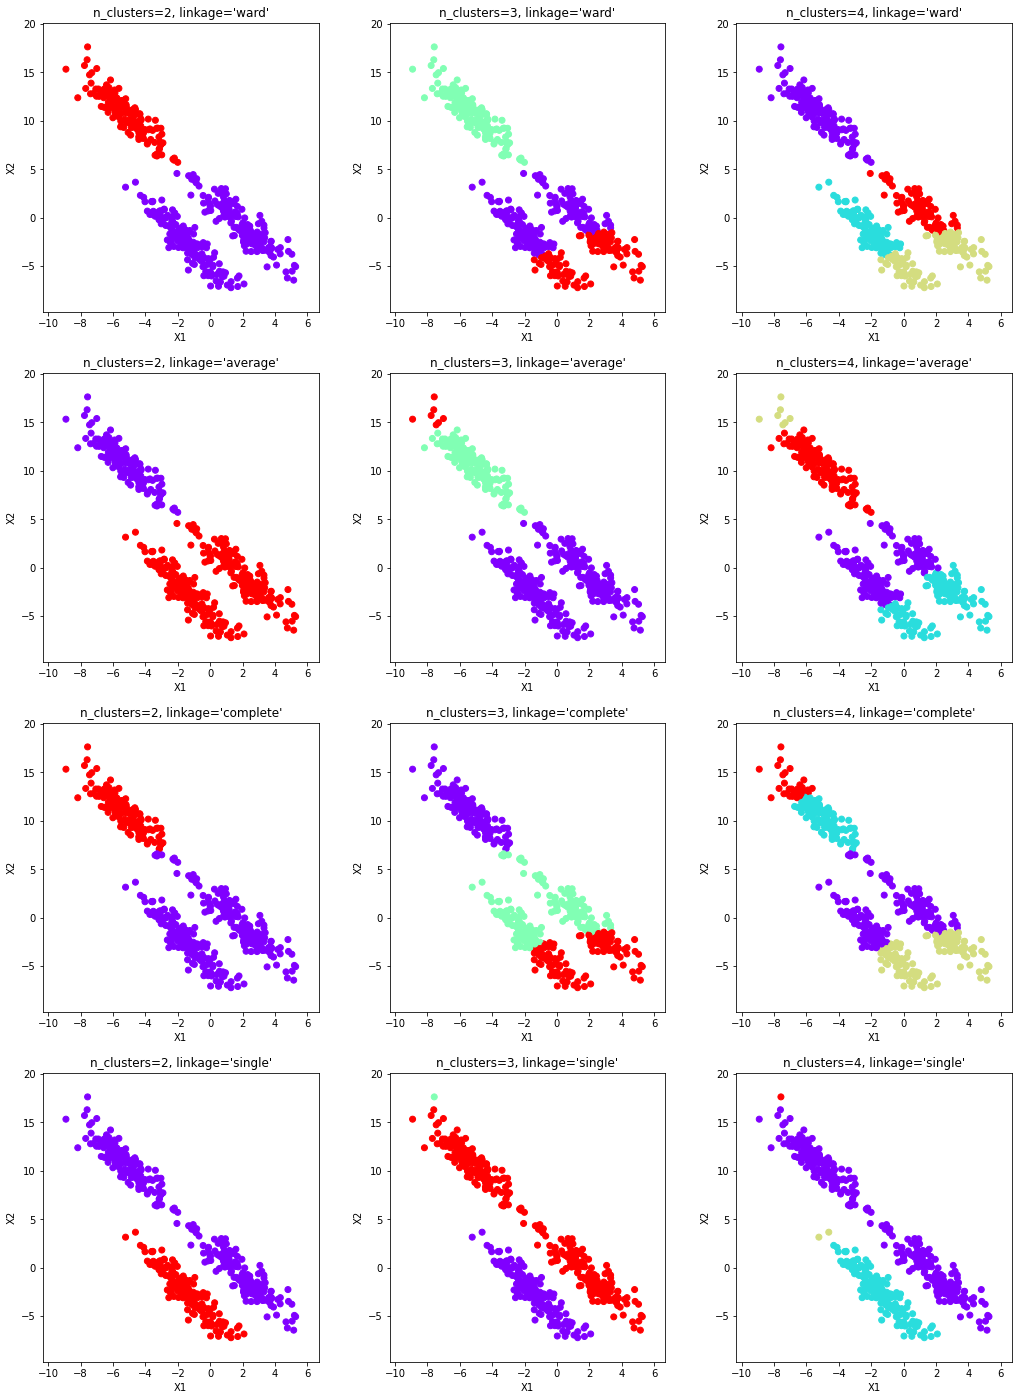

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, cluster_std=2.0, random_state=42)

transformation = [[0.6, -0.6], [-0.4, 1.0]]
X = np.dot(X, transformation)

plot_agglomerative(X=X, n_clusters=[2, 3, 4], linkage=['ward', 'average', 'complete', 'single'])

Funcionamiento con datos uniformes:

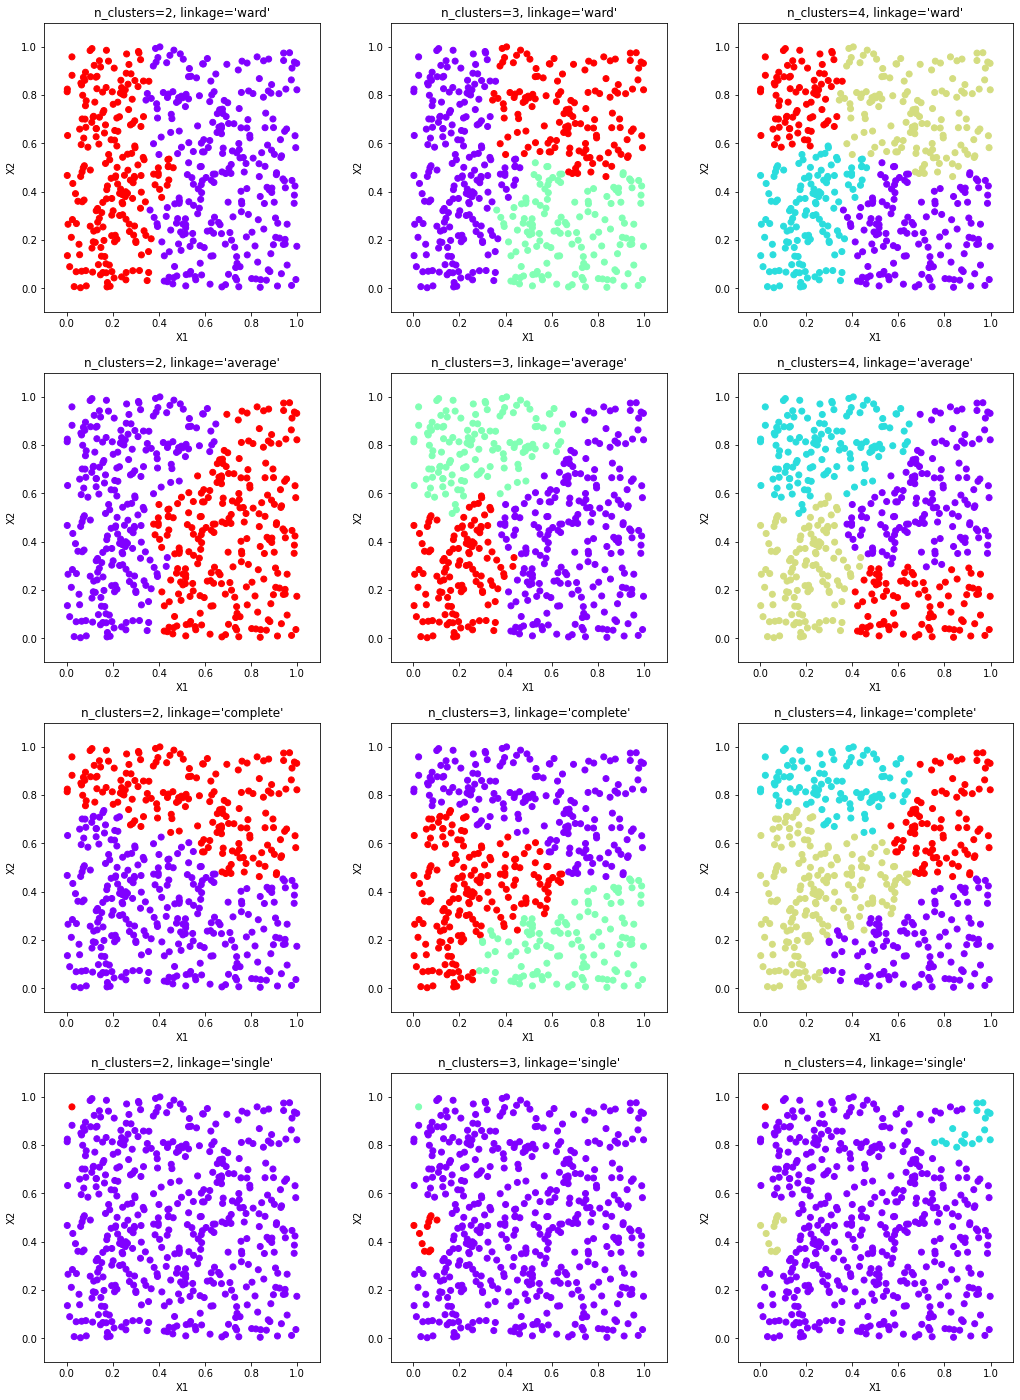

In [9]:
X = np.random.rand(500, 2)

plot_agglomerative(X=X, n_clusters=[2, 3, 4], linkage=['ward', 'average', 'complete', 'single'])

## Caso de estudio: intención de compra
Vamos a cargar un dataset del repositorio [UCI](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset). Es un conjunto de datos de características sobre las sesiones online de compradores en una tienda virtual.

Según la propia descripción del conjunto de datos:



> The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
>
> "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
>
> The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
>
>The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

Por tanto, tenemos 7 variables categóricas que habrá que transformar.


In [10]:
import pandas as pd

raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')
target = raw['Revenue']
raw.drop('Revenue', axis=1, inplace=True)
raw.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

nominal_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
numeric_features = list(set(raw.columns) - set(nominal_features))
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(copy=False), numeric_features),
        ('cat', OneHotEncoder(categories='auto'), nominal_features)])

datos = preprocessor.fit_transform(raw)

In [12]:
datos.shape

(12330, 75)

<AxesSubplot:xlabel='P1', ylabel='P2'>

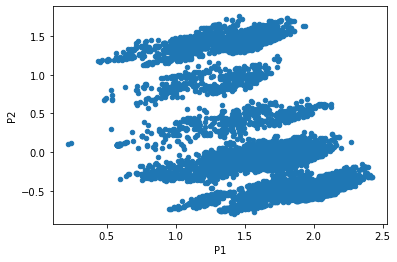

In [13]:
from sklearn.decomposition import TruncatedSVD 
tsvd = TruncatedSVD(n_components=2) 
X_principal = tsvd.fit_transform(datos) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']
X_principal.plot.scatter(x='P1', y='P2')

Y ahora aplicamos **clustering jerárquico aglomerativo** para intentar extraer conocimiento del problema:

In [14]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')

In [15]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

labels = modelo.fit_predict(datos.toarray())

print('Silhouette: ', silhouette_score(datos, labels))
print('Rand Index (con ground truth): ', adjusted_rand_score(target, labels))

Silhouette:  0.1756643286538443
Rand Index (con ground truth):  -0.00013247109879990164


In [16]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

print('Calinski-Harabasz: ', calinski_harabasz_score(datos.toarray(), labels))
print('Davies-Bouldin: ', davies_bouldin_score(datos.toarray(), labels))

Calinski-Harabasz:  1.8847907397845862
Davies-Bouldin:  0.722297176635679
